# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Crear una conexión a la base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# Guardar el DataFrame en la tabla "data" en la base de datos
df.to_sql('data', engine, index=False)

# Ejecutar una consulta SQL para obtener los datos de la tabla
query = 'SELECT * FROM data LIMIT 10'
result = pd.read_sql_query(query, engine)

# Imprimir los resultados
print(result)

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude   
0         John            Brooklyn          Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan             Midtown  40.75362  -73.9

In [3]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
dataframe.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Paso 2: Exploración y limpieza de datos

In [4]:
# Obtener las dimensiones
dataframe.shape

(48895, 16)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Conclusiones

- xxxxxxxxx


In [6]:
#Eliminar duplicados
dataframe.drop("availability_365", axis = 1).duplicated().sum()

print("no hay diplucados en las columnas.")

no hay diplucados en las columnas.


In [7]:
#Eliminar información irrelevante
dataframe.drop(["id", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
dataframe.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariante

In [8]:
'''#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

dataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(data=dataframe, x="neighbourhood_group", ax=axes[1, 0])
sns.histplot(data=dataframe, x="neighbourhood", ax=axes[0, 1])
sns.histplot(data=dataframe, x="room_type", ax=axes[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()'''

'#Análisis sobre variables categóricas\n\nimport matplotlib.pyplot as plt \nimport seaborn as sns\n\ndataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")\n\nfig, axes = plt.subplots(2, 2, figsize=(10, 7))\n\n# Crear un histograma múltiple\nsns.histplot(data=dataframe, x="neighbourhood_group", ax=axes[1, 0])\nsns.histplot(data=dataframe, x="neighbourhood", ax=axes[0, 1])\nsns.histplot(data=dataframe, x="room_type", ax=axes[1, 1])\n\n# Ajustar el layout\nplt.tight_layout()\n\n# Mostrar el plot\nplt.show()'

Conclusiones

- xxxxxxxxx

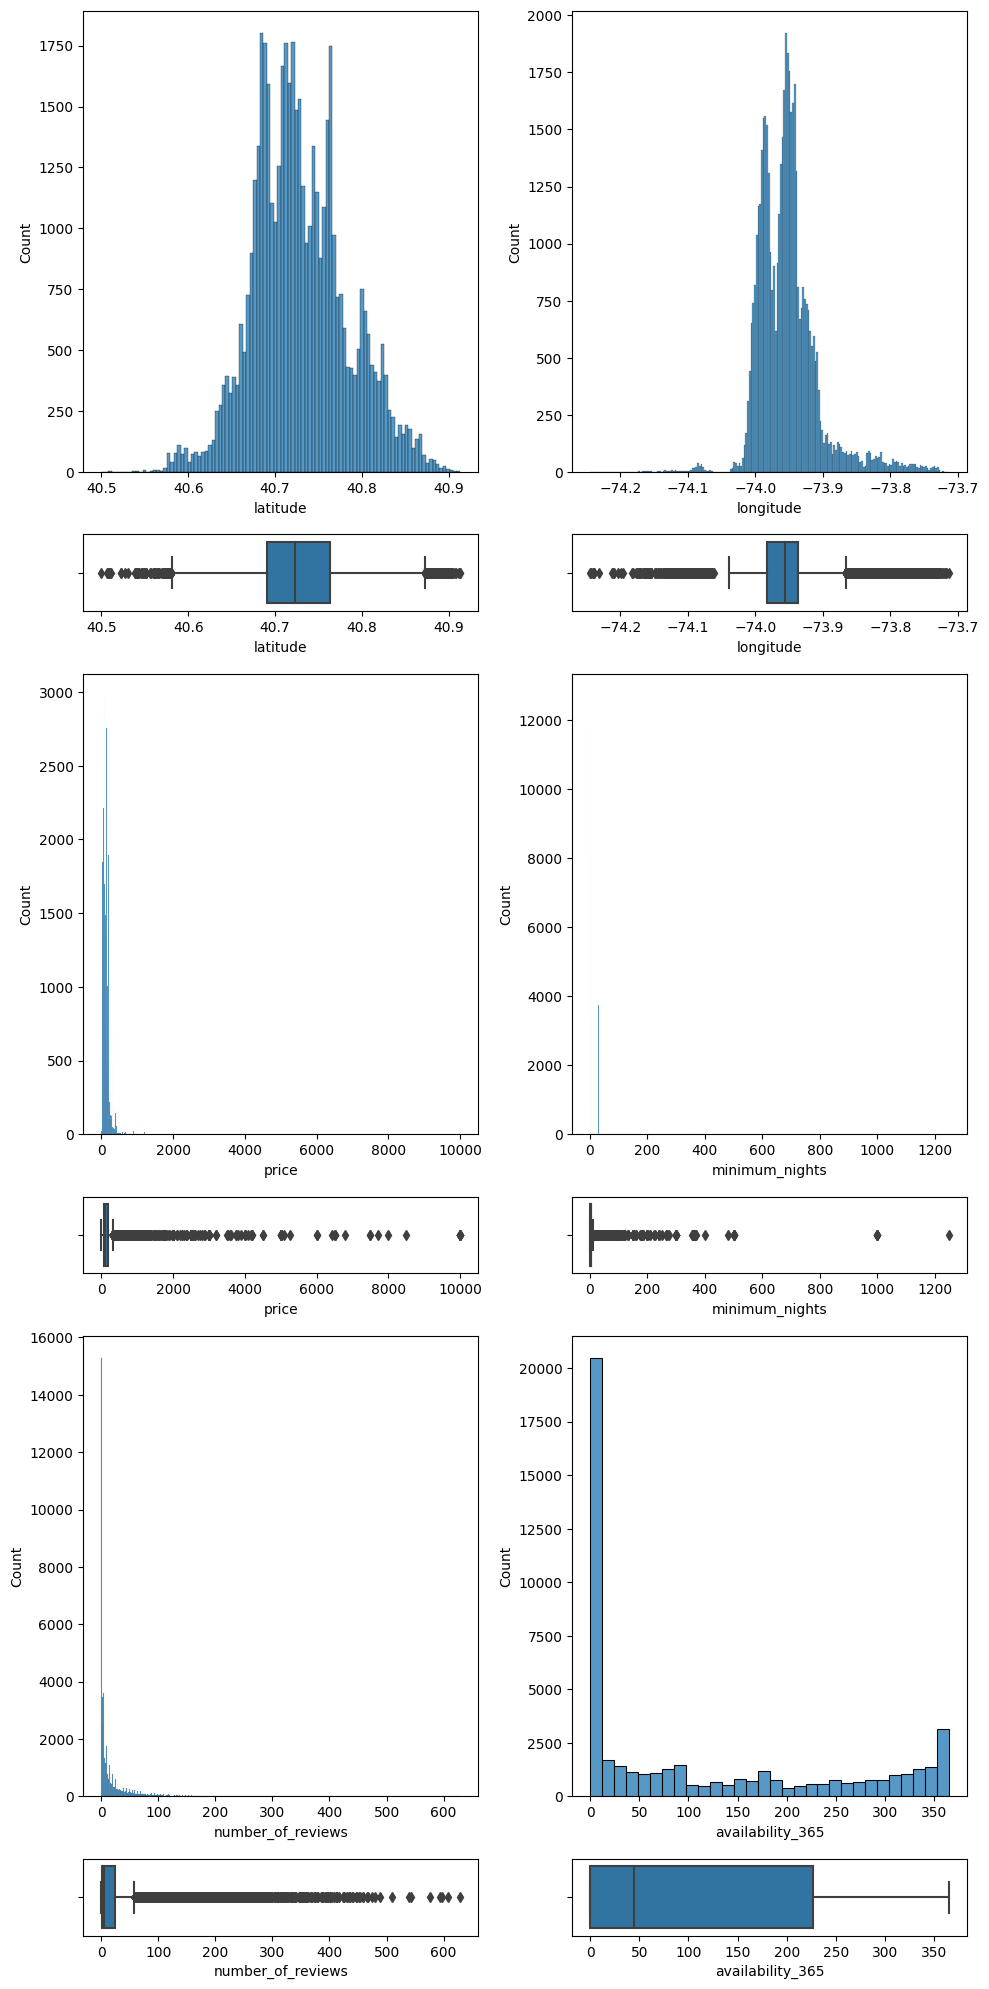

In [9]:
#Análisis sobre variables numéricas

import matplotlib.pyplot as plt 
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(6, 2, figsize=(10, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="latitude")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="latitude")
sns.histplot(ax=axis[0, 1], data=dataframe, x="longitude")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="longitude")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="price")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="price")
sns.histplot(ax=axis[2, 1], data=dataframe, x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="minimum_nights")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="number_of_reviews")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="number_of_reviews")
sns.histplot(ax=axis[4, 1], data=dataframe, x="availability_365")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- xxxxxxxxx

### Paso 4: Análisis de variables multivariante

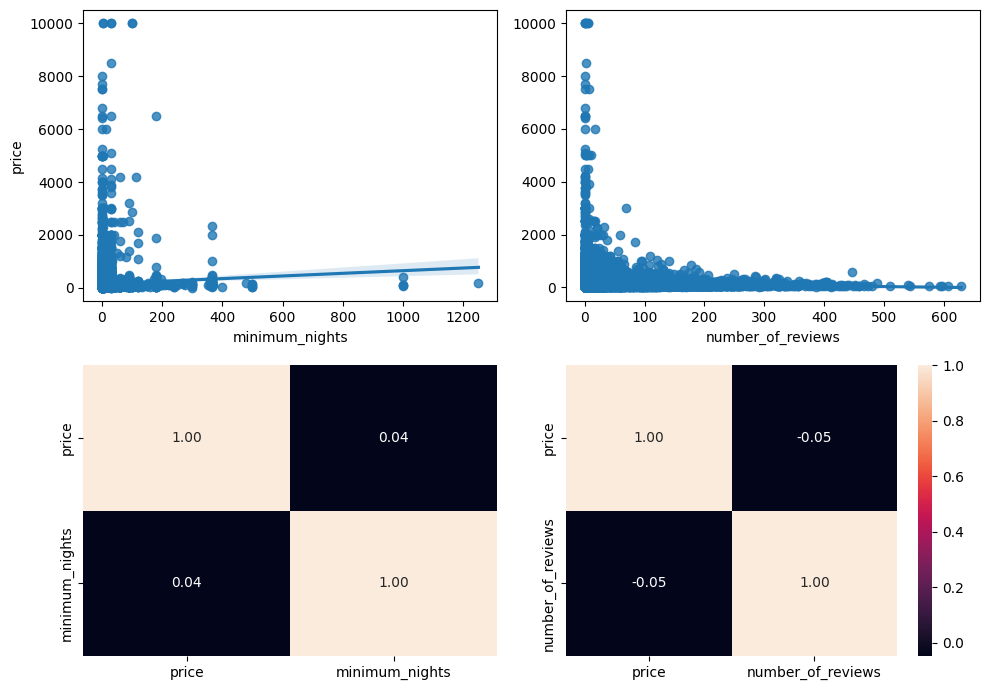

In [10]:
#Análisis numérico-numérico

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataframe, x = "minimum_nights", y = "price")
sns.heatmap(dataframe[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataframe, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(dataframe[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



Conclusiones

- xxxxxxxxx

In [ ]:
#Análisis categórico-categórico


fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.countplot(ax = axis[0, 0], data = dataframe, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[0, 1], data = dataframe, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = dataframe, x = "room_type", hue = "price").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Conclusiones

- xxxxxxxxx

In [ ]:
#Combinaciones de la clase con varias predictoras


fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data=dataframe.iloc[:, :10], x = "number_of_reviews", y = "price", hue = "calculated_host_listings_count")
sns.barplot(ax = axis[1], data = dataframe, x = "minimum_nights", y = "price", hue = "calculated_host_listings_count").set(ylabel = None)

#plt.tight_layout()

plt.show()

Conclusiones

- xxxxxxxxx

ValueError: could not convert string to float: 'Brooklyn'

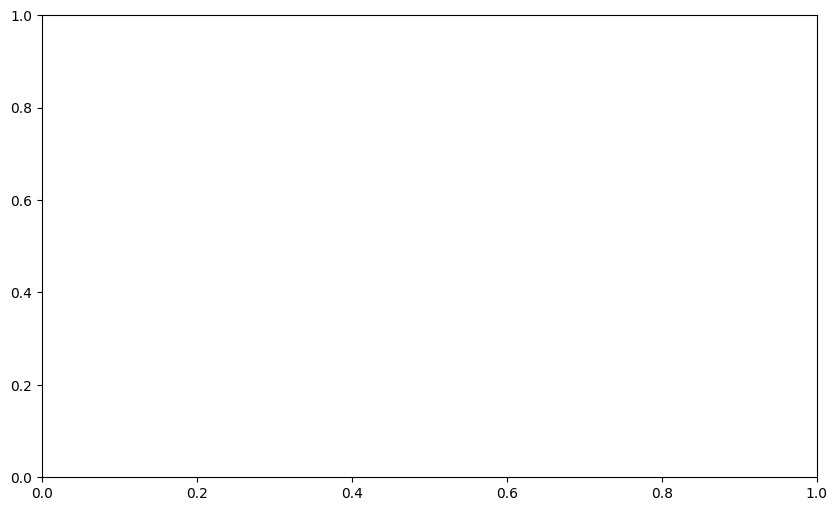

In [ ]:
#Análisis de correlaciones


dataframe["neighbourhood_group_n"] = pd.factorize(dataframe["neighbourhood_group"])[0]
dataframe["neighbourhood_n"] = pd.factorize(dataframe["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dataframe[["neighbourhood_group", "neighbourhood", "room_type"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

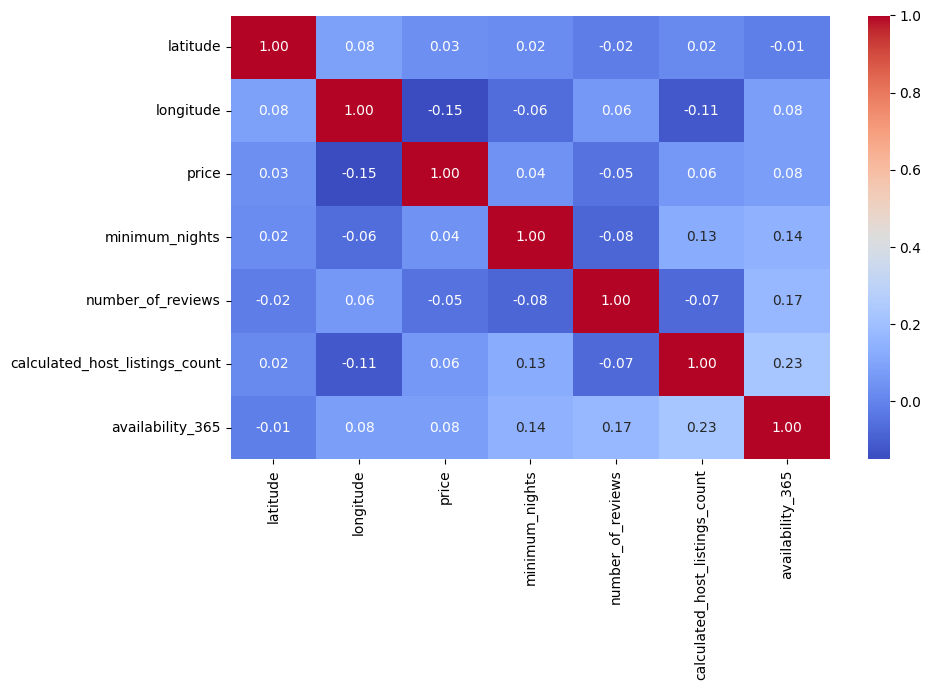

In [ ]:
#Análisis numérico-categórico (completo)


# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# Crear una figura para el mapa de calor de correlación
fig, axis = plt.subplots(figsize=(10, 7))

# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix = dataframe[numeric_columns].corr()

# Crear el mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()

plt.show()